# Learning Curves: Training vs Test Error

This notebook demonstrates how model performance changes as the amount of
training data increases.

We visualize **training error** and **test error** to understand:
- overfitting
- underfitting
- generalization
- the effect of data size


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
np.random.seed(42)

# Generate data
X = np.linspace(0, 10, 200).reshape(-1, 1)
y = 2 * X.squeeze() + np.random.randn(200) * 2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [4]:
def learning_curve(model, X_train, y_train, X_test, y_test):
    train_errors = []
    test_errors = []
    
    for m in range(5, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    return train_errors, test_errors


In [5]:
model = LinearRegression()
train_errors, test_errors = learning_curve(
    model, X_train, y_train, X_test, y_test
)


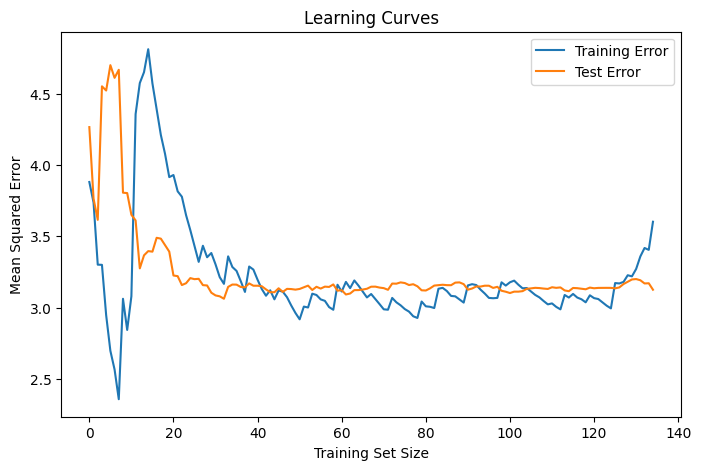

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label="Training Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.legend()
plt.show()


## Interpretation

- Training error is low when the model sees very little data.
- As more data is added, training error increases slightly.
- Test error decreases as more data is added and eventually stabilizes.

This demonstrates:
- Why overfitting happens with small datasets
- Why more data improves generalization
- Why training error alone is misleading


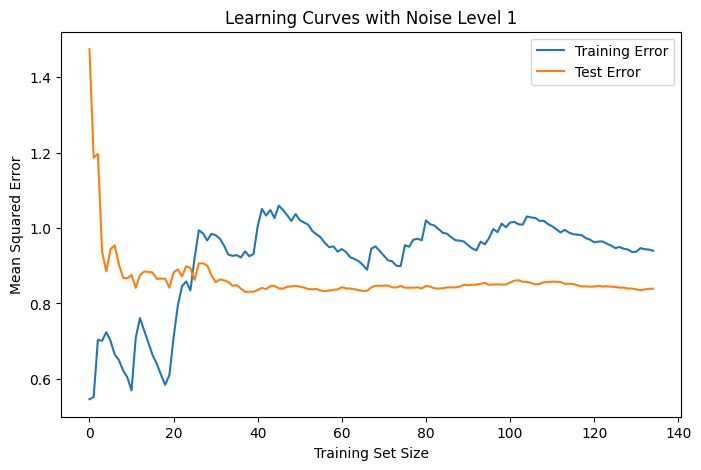

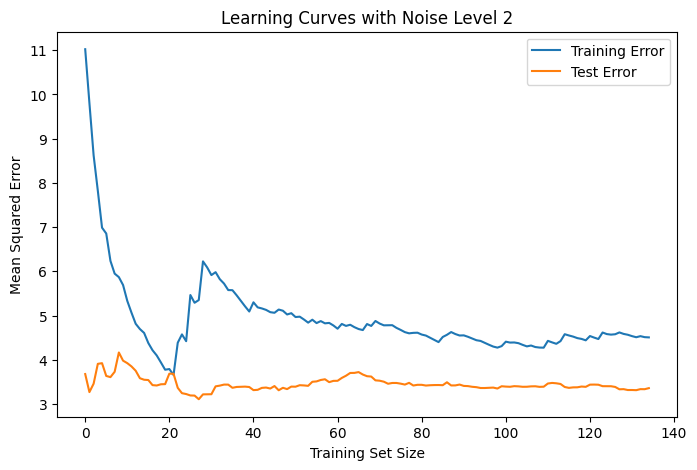

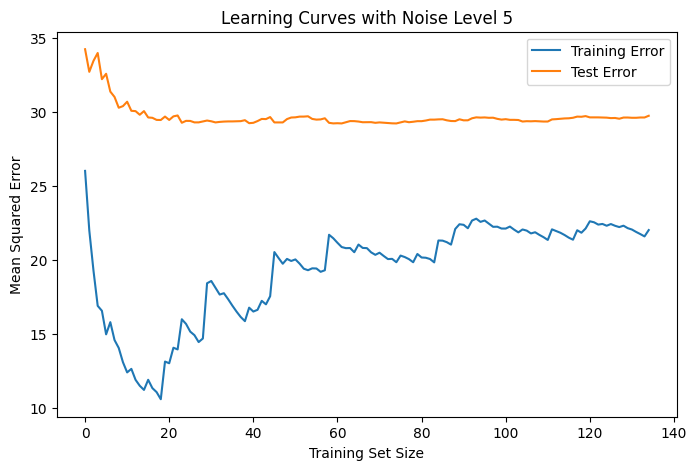

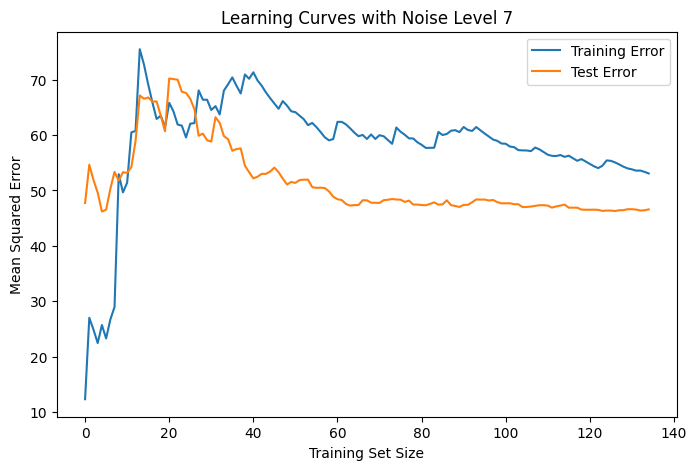

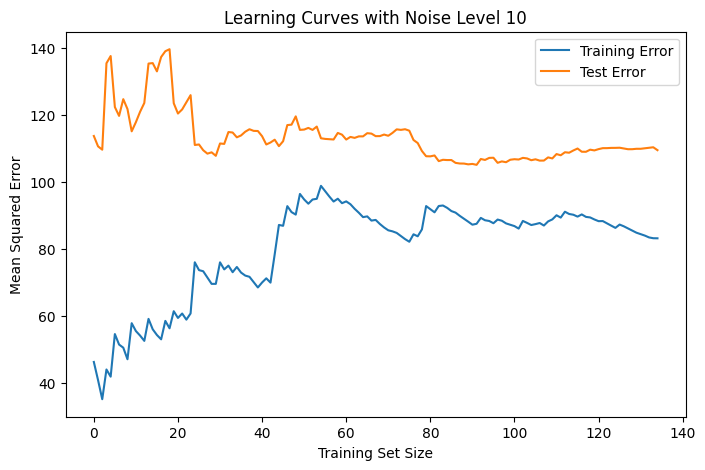

In [8]:
# Increasing the noise level

for noise_level in [1, 2, 5, 7, 10]:
    y_noisy = 2 * X.squeeze() + np.random.randn(200) * noise_level
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_noisy, test_size=0.3, random_state=42
    )
    
    train_errors, test_errors = learning_curve(
        model, X_train, y_train, X_test, y_test
    )
    
    plt.figure(figsize=(8, 5))
    plt.plot(train_errors, label="Training Error")
    plt.plot(test_errors, label="Test Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title(f"Learning Curves with Noise Level {noise_level}")
    plt.legend()
    plt.show()

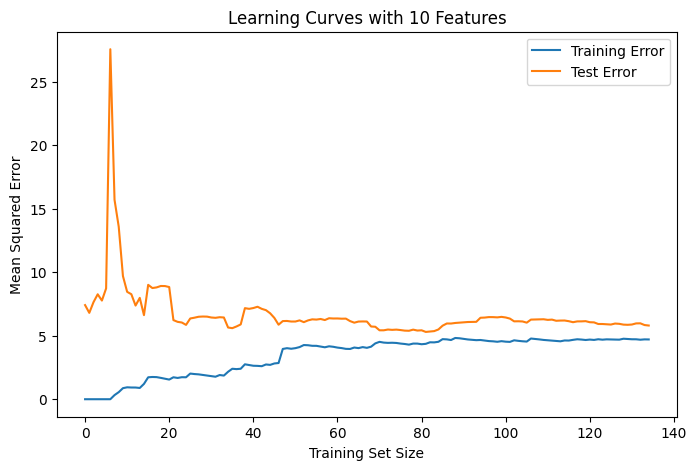

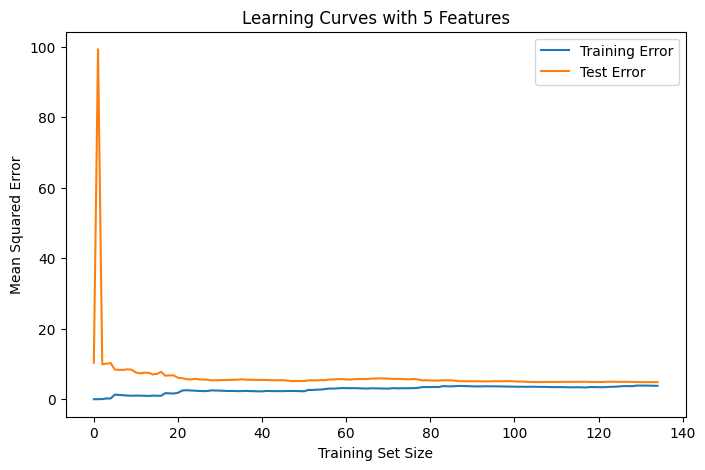

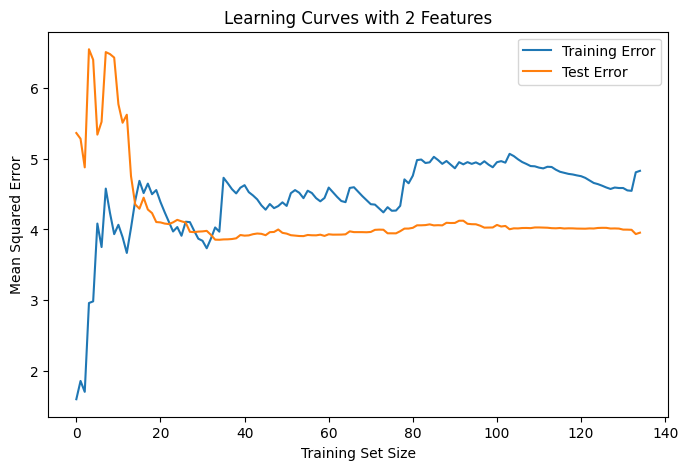

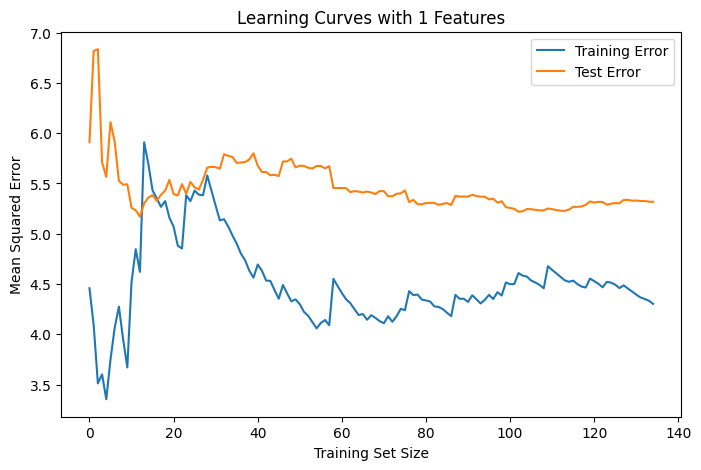

In [10]:
# when number of features is reduced

for num_features in [10, 5, 2, 1]:
    X_multi = np.hstack([X + np.random.randn(200, 1) * 0.5 for _ in range(num_features)])
    y_multi = 2 * X.squeeze() + np.random.randn(200) * 2
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_multi, y_multi, test_size=0.3, random_state=42
    )
    
    train_errors, test_errors = learning_curve(
        model, X_train, y_train, X_test, y_test
    )
    
    plt.figure(figsize=(8, 5))
    plt.plot(train_errors, label="Training Error")
    plt.plot(test_errors, label="Test Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title(f"Learning Curves with {num_features} Features")
    plt.legend()
    plt.show()

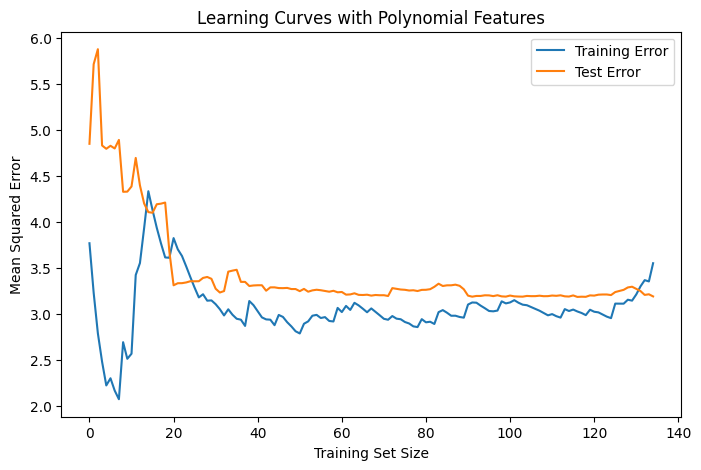

In [11]:
# Using the polynomial model instead of linear model
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.3, random_state=42
)
train_errors, test_errors = learning_curve(
    model, X_train, y_train, X_test, y_test
)
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label="Training Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves with Polynomial Features")
plt.legend()
plt.show()